# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m=1
p = 0.01#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [2]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false

false

In [3]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [4]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [5]:
print(N)

400.0

In [6]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [23]:
using Printf
include("./TMYangMills.jl");

In [24]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.0025
the time step is 0.001


# Initial data of m β Ψ and Ψ,x

In [36]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initpi=zeros(L)
initderxchi=zeros(L)
initderpsi=zeros(L)
initxchi=zeros(L)

#state array is m beta psi xxchi,u xchi,rORx psi,r xchi r
state_array=[initm initbeta initpsi initpi initderxchi initderpsi initxchi initX];
#attention:  in noncompactified code derxchi is (xchi),r. in compactified code derxchi is (xchi),x
#xxchi,u=pi

#PSI,R
A=0.075*p*(1−q)
r0=0.75
sigma=0.25

initderpsi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,6] = initderpsi
state_array=ghost(state_array)

#XCHI
A=0.25*p*q
r0=0.3
sigma=0.1

initxchi[4:L-3] = init_xchi(initX1,r0,sigma,A)

state_array[:,7] = initxchi

####
#PSI FROM PSI,R, CHI,R FROM CHI
xchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,7],  k=4);

state_array[4:L-3,5]=Der_array(state_array,7,initX)[4:L-3]#derivative(xchi_func, initX1; nu=1)#Der_array(state_array,7,initX)[4:L-3]

derxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,5],  k=4);
derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,6],  k=4);

state_array[:,5]=secondparity(state_array[:,5])
aux=Der_array(state_array,5,initX)[4:L-3]
derrxchi_func = Spline1D(initX[4:L-3], aux,  k=4);

funcs=[derxchi_func derpsi_func xchi_func derrxchi_func];

In [37]:
y0=[0.0 0.0 0.0 0.0]

state_array[4:L-3,1:4] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);

#state_array = ghost(state_array);

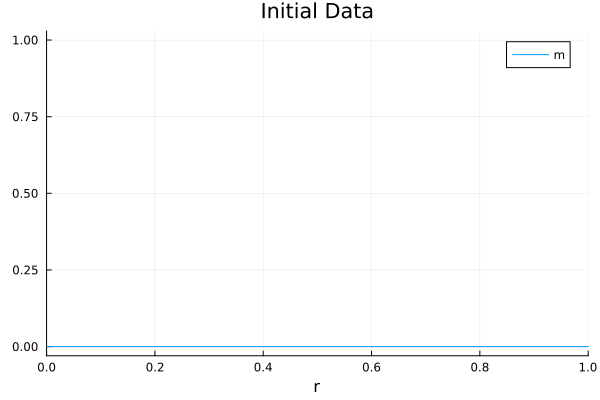

In [38]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "xxchi,u" "derxchi" "psi,r" "xchi"],xlim=[0,1])

In [39]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [40]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "deruxxchi", "derxchi", "derpsi", "xchi", "massloss"]

massloss = zeros(L)
massloss[4:L-3] = masslossfunc(state_array)[4:L-3]
print_muninn(files, 0, [state_array[:,1:7] massloss],res,"w", state_array[:,8])

In [41]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [42]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.51254703173975


In [43]:
using Base.Threads
Threads.nthreads()

4

In [44]:
dt=0.001

0.001

 ## Time evolution

fixed grid

In [45]:
finaltime=4.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.001, t=0.10000000000000007 speed is 0.49750312500000005, dx/dt=2.5


iteration 200 dt is 0.001, t=0.20000000000000015 speed is 0.49750312500000005, dx/dt=2.5


iteration 300 dt is 0.001, t=0.3000000000000002 speed is 0.49750312500000005, dx/dt=2.5


iteration 400 dt is 0.001, t=0.4000000000000003 speed is 0.49750312500000005, dx/dt=2.5


iteration 500 dt is 0.001, t=0.5000000000000003 speed is 0.49750312500000005, dx/dt=2.5


iteration 600 dt is 0.001, t=0.6000000000000004 speed is 0.49750312500000005, dx/dt=2.5


LoadError: InterruptException:

In [96]:
using LsqFit

tdata = [1, 2, 3]
ydata = [1, 4, 9]

ff(t, p) = p[1] * exp.(p[2] * t)
p0 = [0.5, 0.5]
fit = curve_fit(ff, tdata, ydata, p0);

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Int64}}([0.5832683311298664, 0.9148101953860868], [0.45601355006651345, -0.3653513403160016, 0.0731785282761912], [2.496301397439191 1.4560135500568188; 6.231520666775041 7.2692973195687145; 15.55575374834134 27.21953558655667], true, Int64[])

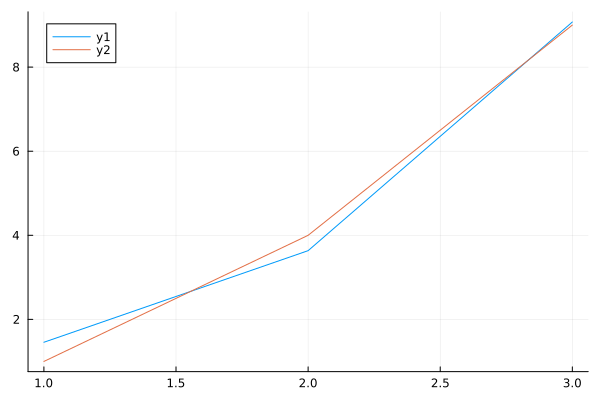

In [102]:
yfit = ff(tdata,fit.param)
plot(tdata, [yfit ydata])